In [1]:
import warnings # Avoid warnings.
warnings.simplefilter("ignore")


import pandas as pd # Structure & manipulation of data.
import numpy as np # Numeric calcul.
import matplotlib.pyplot as plt # Graphics.

In [2]:
#Reading csv.
df = pd.read_csv("student-mat.csv")

In [3]:
# Five firsts lines.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# We get a matrice of 395x33.
df.shape

(395, 33)

In [5]:
# Verification of missing data.
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# Number of features on each variables.
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [7]:
# Data types. (Can see if there are discrete data at the place of a continue data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
def recuperate_labels_from_one_label(data, label, sublabel):
    """Recuperate the label interest & the average of the G3."""
    return data[data[label] == sublabel]["G3"].mean()

In [10]:
def ploting(dico, titre):
    """Plot variables in function of the mean of the last test."""
    plt.title(titre)
    width = 1
    [plt.bar(label, mean, width) for label, mean in dico.items()]
    plt.show()

In [11]:
def ploting_camembert(dico, titre):
 
    plt.title(titre)

    recuperate_ = lambda data: [i for i in data]
    label = recuperate_(dico.keys())
    value = recuperate_(dico.values())

    plt.pie(value, labels = label)

    plt.show()

# Analyse univarié

# école et note final

Est-ce que l'école influe sur la note finale ?

In [12]:
# Recuperate school labels.
school_labels = df["school"].unique()

In [13]:
dico_nb_person_from_school = {school: len(df[df["school"] == school]) for school in school_labels}
dico_nb_person_from_school

{'GP': 349, 'MS': 46}

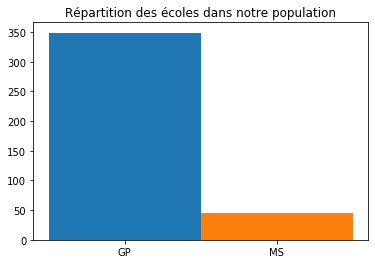

In [14]:
ploting(dico_nb_person_from_school, "Répartition des écoles dans notre population")

Nous remarquons une asymétrie du nombre de donnée entre chaque école.

1) Calcul de la moyenne de la note final en fonction de l'école.

In [15]:
schools = {school: recuperate_labels_from_one_label(df, "school", school) for school in df["school"].unique()}
schools

{'GP': 10.489971346704872, 'MS': 9.847826086956522}

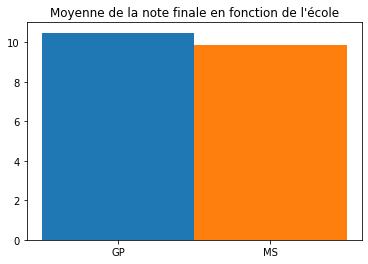

In [16]:
ploting(schools, "Moyenne de la note finale en fonction de l'école")

Il semble qu'il n'y ai pas de grande différence entre l'école 1 et 2 pour la note finale.

### L'école à t-elle donc un lien avec notre étude ?

Il semble qu'il n'y ai aucunes différences entre l'école 1 et 2 sur la note finale.


Par le nombre de donnée de l'écoles MS, et par la moyenne de la note finale. 

Nous ne conservons pas la variable "school".

In [17]:
del df["school"]

# Sexe et note final

In [18]:
sexe_label = ["M", "F"]

In [19]:
dico = {label: len(df[df["sex"] == label]) for label in sexe_label}
dico

{'M': 187, 'F': 208}

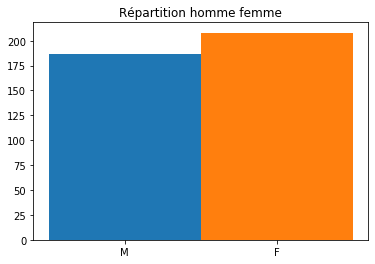

In [20]:
ploting(dico, "Répartition homme femme")

Nous pouvons voir que la répartition de notre échantillon est uniformément réparti.

In [21]:
dico = {label: recuperate_labels_from_one_label(df, "sex", label) for label in sexe_label}
dico

{'M': 10.914438502673796, 'F': 9.966346153846153}

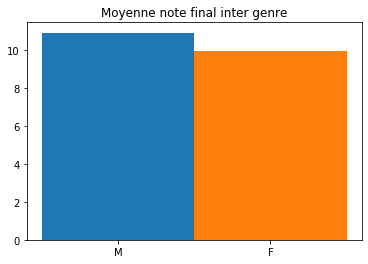

In [22]:
ploting(dico, "Moyenne note final inter genre")

Il semble qu'il n'y ai pas de différence significative sur la note final en fonction du sexe.

Hypothèse: nous pouvons supprimer la variable catégorielle sexe.

In [23]:
del df["sex"]

## Age et note finale

In [24]:
df.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,17,U,GT3,T,1,1,at_home,other,course,father,...,5,3,3,1,1,3,4,5,5,6
2,15,U,LE3,T,1,1,at_home,other,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,15,U,GT3,T,4,2,health,services,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,16,U,GT3,T,3,3,other,other,home,father,...,4,3,2,1,2,5,4,6,10,10


In [25]:
age_label = sorted(df["age"].unique())
age_label

[15, 16, 17, 18, 19, 20, 21, 22]

Nous pouvons voir que l'étendue est de: 8 et que la moyenne d'age est de 18.5. Notre échantillon est dans l'interval fermé [15; 22]

In [26]:
nombre_age = {age: len(df[df["age"] == age]) for age in age_label}
nombre_age

{15: 82, 16: 104, 17: 98, 18: 82, 19: 24, 20: 3, 21: 1, 22: 1}

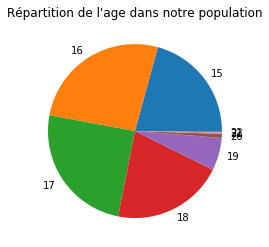

In [27]:
ploting_camembert(nombre_age, "Répartition de l'age dans notre population")

In [28]:
# Diagramme à moustage

In [29]:
mean_person_age = sum(v for k, v in nombre_age.items()) / len(nombre_age)
mean_person_age

49.375

Il semble que nous avons des données continues peu représentatives dans notre échantillon.

Les ages: 19, 20 21 et 22 ne sont pas etre pris en compte car ils ne sont représentatifs

Hypothèse 0: a note finale, ou l'ensemble des 3 notes sont influencées par l'age.

In [30]:
age_note = {label: recuperate_labels_from_one_label(df, "age", label) for label in age_label}
age_note = dict(sorted(age_note.items(), key=lambda item: item[1]))
[print("age :", k, " -> ", round(v, 2), "  nombre échantillon:", nombre_age[k]) for k, v in age_note.items()]

age : 21  ->  7.0   nombre échantillon: 1
age : 22  ->  8.0   nombre échantillon: 1
age : 19  ->  8.21   nombre échantillon: 24
age : 18  ->  9.55   nombre échantillon: 82
age : 17  ->  10.28   nombre échantillon: 98
age : 16  ->  11.03   nombre échantillon: 104
age : 15  ->  11.26   nombre échantillon: 82
age : 20  ->  14.0   nombre échantillon: 3


[None, None, None, None, None, None, None, None]

Dans nos échantillons de la tranche d'age: [15;18] l'age n'influence pas la note finale.

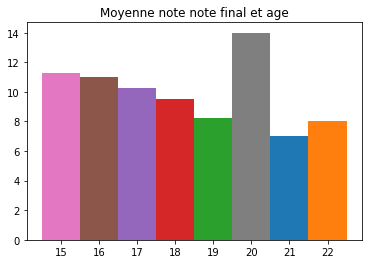

In [31]:
ploting(age_note, "Moyenne note note final et age")

Nous décidons de supprimer les échantillons des ages de: [20, 21, 22]

In [32]:
[df.drop(df.loc[df['age'] == i].index, inplace=True) for i in [20, 21, 22]]

[None, None, None]

## Après suppression

In [33]:
age_note = {label: recuperate_labels_from_one_label(df, "age", label) for label in age_label}
age_note = dict(sorted(age_note.items(), key=lambda item: item[1]))

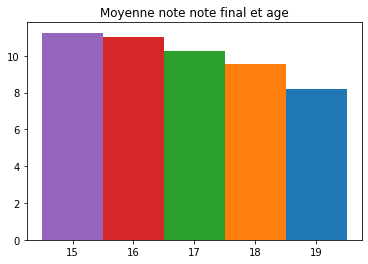

In [34]:
ploting(age_note, "Moyenne note note final et age")

h0 L'age serait-il corrélé à la moyenne de la note ? oui

In [35]:
#del df["traveltime"]

# Adresse et note finale

In [36]:
df.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,17,U,GT3,T,1,1,at_home,other,course,father,...,5,3,3,1,1,3,4,5,5,6
2,15,U,LE3,T,1,1,at_home,other,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,15,U,GT3,T,4,2,health,services,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,16,U,GT3,T,3,3,other,other,home,father,...,4,3,2,1,2,5,4,6,10,10


In [37]:
label_adresse = df["address"].unique()
label_adresse

array(['U', 'R'], dtype=object)

Il semble que nous ayons 2 type d'adresses dans notre dataset.

Hypothèse 0: L'adresse influence t-elle la note finale ?

In [38]:
dico = {address: len(df[df["address"] == address]) for address in label_adresse}
dico

{'U': 303, 'R': 87}

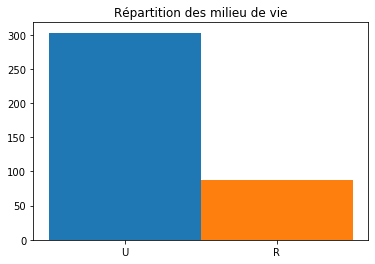

In [39]:
ploting(dico, "Répartition des milieu de vie")

In [40]:
print("Il semble que nous ayons une majorité de personne vivant en urbain de ratio:", dico["U"] / dico["R"], "entre les deux données")

Il semble que nous ayons une majorité de personne vivant en urbain de ratio: 3.4827586206896552 entre les deux données


In [41]:
milieu_de_vie_et_note = {label: recuperate_labels_from_one_label(df, "address", label) for label in label_adresse}
milieu_de_vie_et_note

{'U': 10.650165016501651, 'R': 9.540229885057471}

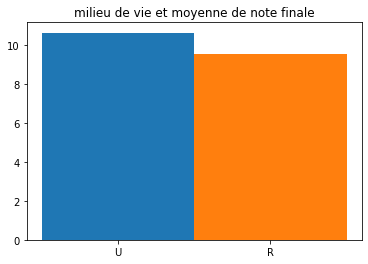

In [42]:
ploting(milieu_de_vie_et_note, "milieu de vie et moyenne de note finale")

Avec une confiance < 80 % et une marge d'erreur > 5 % nous décidons de supprimer la variable catégorielle "adresse" par son manque de représentativité dans la population.

In [43]:
del df["address"]

### Family size and final note

In [44]:
df.head()

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,4,3,4,1,1,3,6,5,6,6
1,17,GT3,T,1,1,at_home,other,course,father,1,...,5,3,3,1,1,3,4,5,5,6
2,15,LE3,T,1,1,at_home,other,other,mother,1,...,4,3,2,2,3,3,10,7,8,10
3,15,GT3,T,4,2,health,services,home,mother,1,...,3,2,2,1,1,5,2,15,14,15
4,16,GT3,T,3,3,other,other,home,father,1,...,4,3,2,1,2,5,4,6,10,10


In [45]:
famsize = df["famsize"].unique()
famsize

array(['GT3', 'LE3'], dtype=object)

In [46]:
fam_size = {label: len(df[df["famsize"] == label]) for label in famsize}
fam_size

{'GT3': 277, 'LE3': 113}

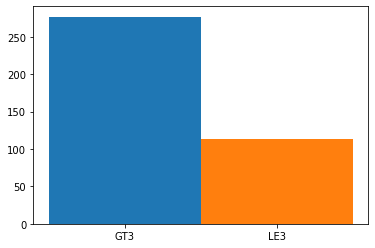

In [47]:
ploting(fam_size, "")

Il semble que nous ayons 281 familles > 3. Contre 114 familles <= 3.

Est-ce que le nombre de personne dans une famille influence t-il la note finale ?

In [48]:
famsiz_note = {label: recuperate_labels_from_one_label(df, "famsize", label) for label in fam_size}
famsiz_note

{'GT3': 10.151624548736462, 'LE3': 11.017699115044248}

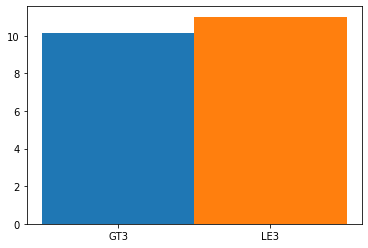

In [49]:
ploting(famsiz_note, "")

Il semble qu'il n'y ai pas de correlation entre le nombre de personne dans une famille et la note finale. De plus, la taille de l'échantillon n'est de "LE3" n'est pas représentative car il est en dessous d'un niveau de confience de 80 % avec une marge d'erreur de > 5 %

In [50]:
del df["famsize"]

### Pstatus et la note final

In [51]:
Pstatus = df["Pstatus"].unique()
Pstatus

array(['A', 'T'], dtype=object)

In [52]:
Pstatus_dico = {label: len(df[df["Pstatus"] == label]) for label in Pstatus}
Pstatus_dico

{'A': 39, 'T': 351}

Il semble que nous avons une asymétrie entre nos deux variables.

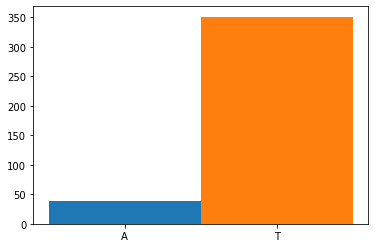

In [53]:
ploting(Pstatus_dico, "")

In [54]:
famsize_note = {label: recuperate_labels_from_one_label(df, "Pstatus", label) for label in Pstatus}
print(famsize_note)

{'A': 11.076923076923077, 'T': 10.327635327635328}


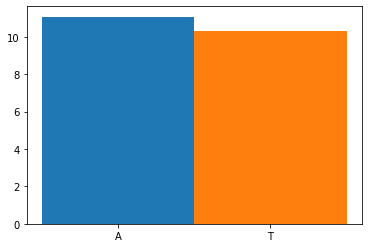

In [55]:
ploting(famsize_note, "")

Il semble qu'il n'y ai pas de correlation entre le nombre de personne dans une famille et la note finale. De plus, la taille de l'échantillon n'est de "LE3" n'est pas représentative car il est en dessous d'un niveau de confience de 80 % avec une marge d'erreur de >= 9 %

In [56]:
del df["Pstatus"]

In [57]:
label_container = df['Medu'].unique()
print(label_container)

[4 1 3 2 0]


In [58]:
nb_var = {label: len(df[df['Medu'] == label]) for label in label_container}
print(nb_var)

{4: 130, 1: 58, 3: 97, 2: 102, 0: 3}


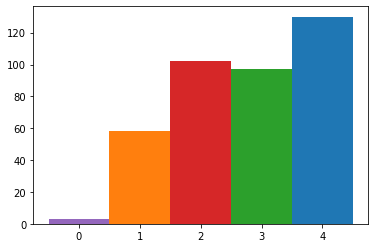

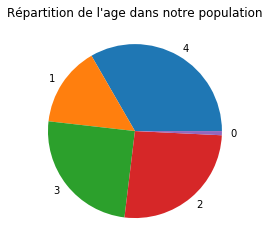

In [59]:
ploting(nb_var, "")
ploting_camembert(nb_var, "Répartition de l'age dans notre population")

In [60]:
df["Medu"].unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [61]:
df = df.drop(df[(df.Medu == 0)].index)
df["Medu"].unique()

array([4, 1, 3, 2], dtype=int64)

In [62]:
label_container = df['Medu'].unique()
nb_var = {label: len(df[df['Medu'] == label]) for label in label_container}
print(nb_var)

{4: 130, 1: 58, 3: 97, 2: 102}


{1: 8.706896551724139, 2: 9.735294117647058, 3: 10.24742268041237, 4: 11.738461538461538}


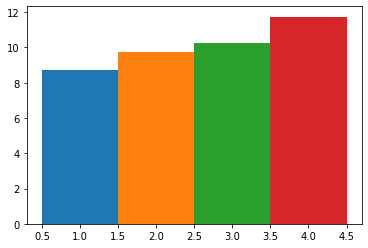

In [63]:
final_note = {label: recuperate_labels_from_one_label(df, 'Medu', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

[4 1 2 3 0]
{4: 96, 1: 79, 2: 110, 3: 100, 0: 2}


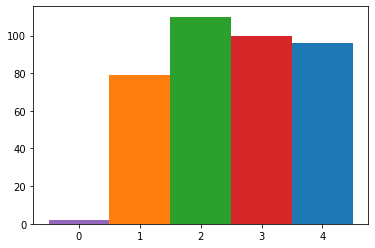

Suppression de Fedu.
{4: 96, 1: 79, 2: 110, 3: 100}


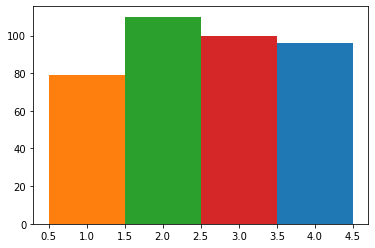

{1: 9.20253164556962, 2: 10.072727272727272, 3: 10.66, 4: 11.364583333333334}


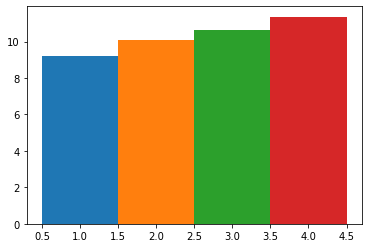

In [64]:
label_container = df['Fedu'].unique()
print(label_container)


nb_var = {label: len(df[df['Fedu'] == label]) for label in label_container}
print(nb_var)
ploting(nb_var, "")


df = df.drop(df[(df.Fedu == 0)].index)
label_container = df['Fedu'].unique()
print("Suppression de Fedu.")

nb_var = {label: len(df[df['Fedu'] == label]) for label in label_container}
print(nb_var)
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'Fedu', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")


les variables
['at_home' 'health' 'other' 'services' 'teacher']

Nombre de variable
{'at_home': 57, 'health': 33, 'other': 138, 'services': 100, 'teacher': 57}



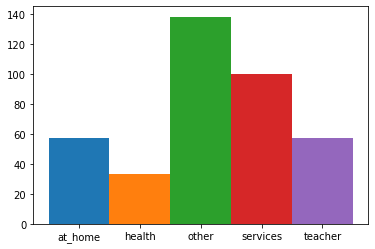

{'at_home': 9.052631578947368, 'other': 9.76086956521739, 'services': 11.0, 'teacher': 11.070175438596491, 'health': 12.06060606060606}


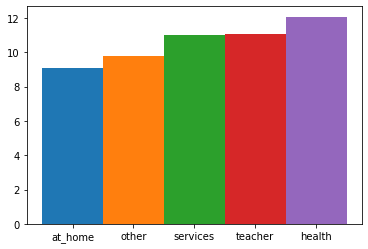

In [65]:
label_container = df['Mjob'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['Mjob'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'Mjob', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [66]:
del df["Mjob"]

les variables
['course' 'other' 'home' 'reputation']

Nombre de variable
{'course': 139, 'other': 34, 'home': 108, 'reputation': 104}



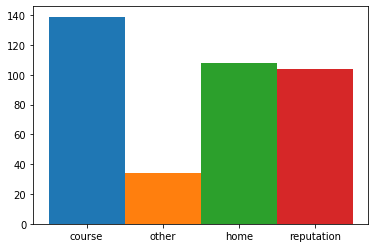

{'course': 9.755395683453237, 'home': 10.212962962962964, 'reputation': 11.096153846153847, 'other': 11.147058823529411}


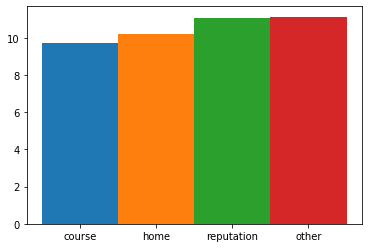

In [67]:
label_container = df['reason'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['reason'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'reason', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [68]:
del df["reason"]

les variables
['mother' 'father' 'other']

Nombre de variable
{'mother': 269, 'father': 89, 'other': 27}



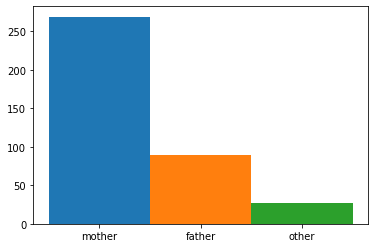

{'other': 8.592592592592593, 'mother': 10.45724907063197, 'father': 10.640449438202246}


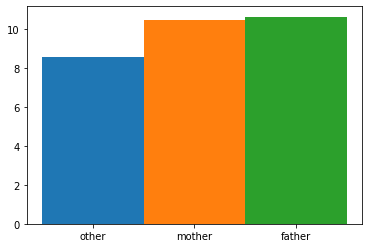

In [69]:
label_container = df['guardian'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['guardian'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'guardian', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [70]:
del df["guardian"]

les variables
[2 1 3 4]

Nombre de variable
{'2': 103, '1': 251, '3': 23, '4': 8}



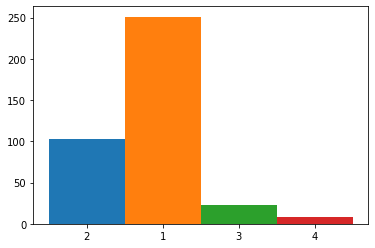

{'4': 8.75, '3': 9.26086956521739, '2': 9.74757281553398, '1': 10.776892430278885}


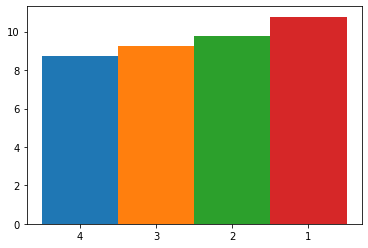

In [71]:
label_container = df['traveltime'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {str(label): len(df[df['traveltime'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {str(label): recuperate_labels_from_one_label(df, 'traveltime', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [72]:
#del df["traveltime"]

les variables
[2 3 1 4]

Nombre de variable
{'2': 195, '3': 63, '1': 101, '4': 26}



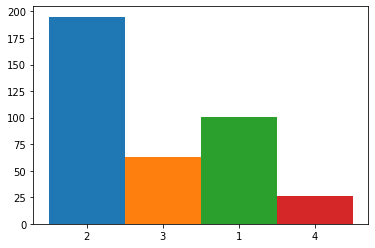

{'1': 9.970297029702971, '2': 10.153846153846153, '3': 11.285714285714286, '4': 11.307692307692308}


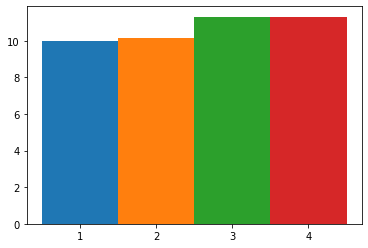

In [73]:
label_container = df['studytime'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {str(label): len(df[df['studytime'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {str(label): recuperate_labels_from_one_label(df, 'studytime', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [74]:
del df["studytime"]

les variables
[0 3 2 1]

Nombre de variable
{'0': 307, '3': 13, '2': 15, '1': 50}



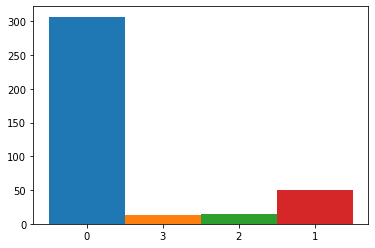

{'3': 5.153846153846154, '2': 5.466666666666667, '1': 8.12, '0': 11.19543973941368}


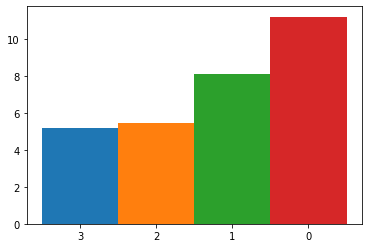

In [75]:
label_container = df['failures'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {str(label): len(df[df['failures'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {str(label): recuperate_labels_from_one_label(df, 'failures', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [76]:
del df["failures"]

les variables
['yes' 'no']

Nombre de variable
{'yes': 51, 'no': 334}



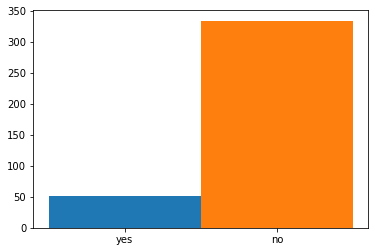

{'yes': 9.431372549019608, 'no': 10.511976047904191}


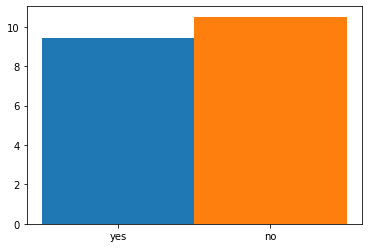

In [77]:
label_container = df['schoolsup'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['schoolsup'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'schoolsup', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [78]:
del df["schoolsup"]

les variables
['no' 'yes']

Nombre de variable
{'no': 147, 'yes': 238}



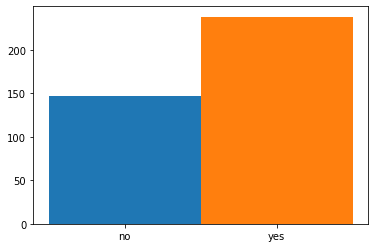

{'yes': 10.239495798319327, 'no': 10.578231292517007}


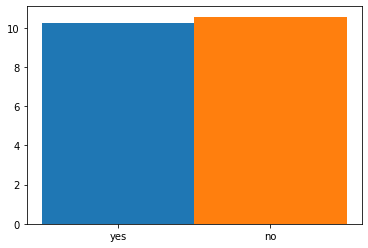

In [79]:
label_container = df['famsup'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['famsup'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'famsup', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [80]:
del df["famsup"]

les variables
['no' 'yes']

Nombre de variable
{'no': 208, 'yes': 177}



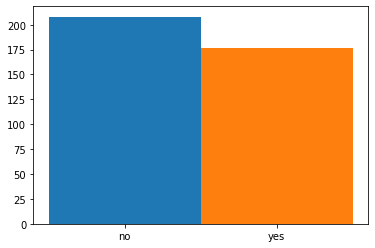

{'no': 9.951923076923077, 'yes': 10.858757062146893}


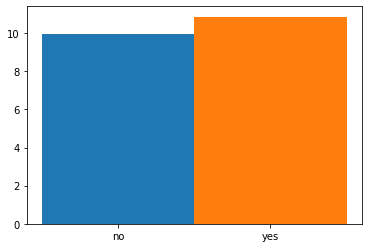

In [81]:
label_container = df['paid'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['paid'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'paid', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

les variables
['no' 'yes']

Nombre de variable
{'no': 187, 'yes': 198}



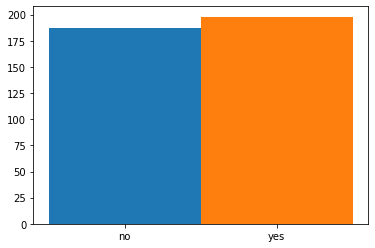

{'no': 10.310160427807487, 'yes': 10.424242424242424}


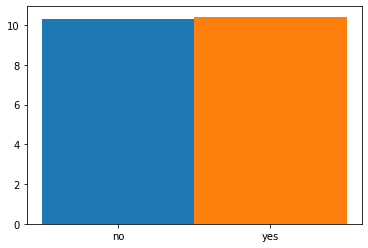

In [82]:
label_container = df['activities'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['activities'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'activities', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [83]:
del df["activities"]

les variables
['yes' 'no']

Nombre de variable
{'yes': 309, 'no': 76}



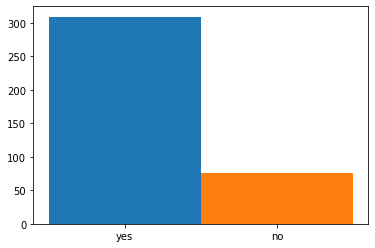

{'no': 9.894736842105264, 'yes': 10.485436893203884}


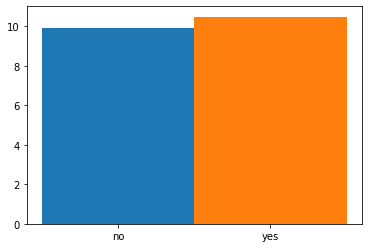

In [84]:
label_container = df['nursery'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['nursery'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'nursery', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [85]:
del df["nursery"]

les variables
['yes' 'no']

Nombre de variable
{'yes': 367, 'no': 18}



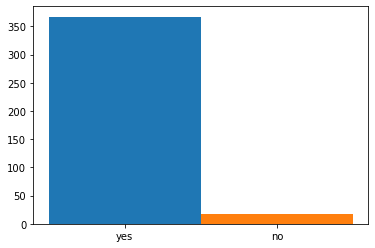

{'no': 6.611111111111111, 'yes': 10.553133514986376}


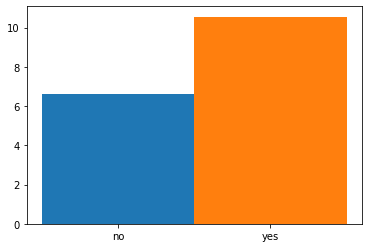

In [86]:
label_container = df['higher'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['higher'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'higher', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [87]:
del df["higher"]

les variables
['no' 'yes']

Nombre de variable
{'no': 62, 'yes': 323}



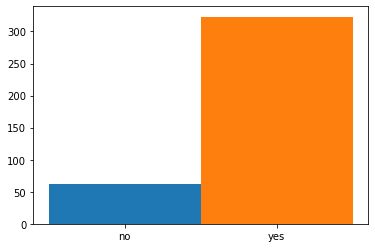

{'no': 9.32258064516129, 'yes': 10.569659442724458}


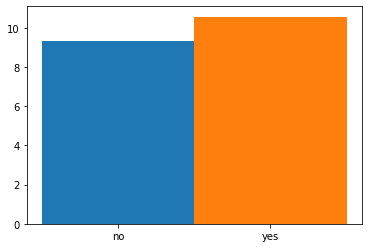

In [88]:
label_container = df['internet'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['internet'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'internet', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [89]:
del df["internet"]

les variables
['no' 'yes']

Nombre de variable
{'no': 256, 'yes': 129}



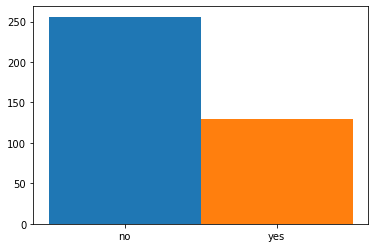

{'yes': 9.496124031007753, 'no': 10.80859375}


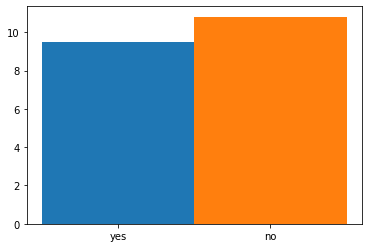

In [90]:
label_container = df['romantic'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['romantic'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'romantic', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

les variables
[4 5 3 1 2]

Nombre de variable
{4: 193, 5: 101, 3: 65, 1: 8, 2: 18}



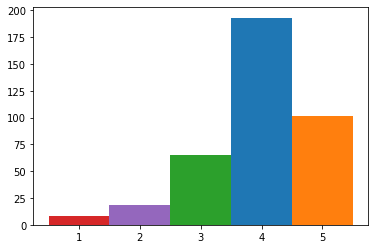

{2: 9.88888888888889, 3: 9.984615384615385, 4: 10.305699481865284, 1: 10.625, 5: 10.801980198019802}


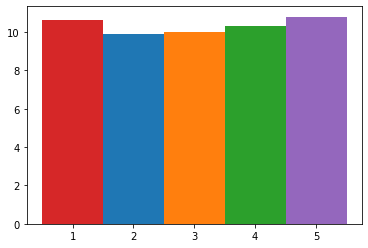

In [91]:
label_container = df['famrel'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['famrel'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'famrel', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [92]:
df.head()

,age,Medu,Fedu,Fjob,traveltime,paid,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,teacher,2,no,no,4,3,4,1,1,3,6,5,6,6
1,17,1,1,other,1,no,no,5,3,3,1,1,3,4,5,5,6
2,15,1,1,other,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,15,4,2,services,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,16,3,3,other,1,yes,no,4,3,2,1,2,5,4,6,10,10


les variables
[3 2 4 1 5]

Nombre de variable
{3: 154, 2: 64, 4: 111, 1: 19, 5: 37}



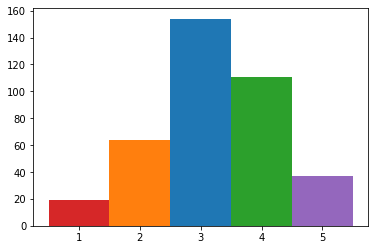

{3: 9.675324675324676, 1: 9.842105263157896, 4: 10.423423423423424, 5: 11.297297297297296, 2: 11.5625}


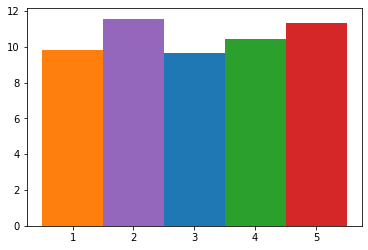

In [93]:
label_container = df['freetime'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['freetime'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'freetime', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [94]:
df = df.drop(df[(df.freetime == 1)].index)
df = df.drop(df[(df.freetime == 5)].index)

In [95]:
df.head()

,age,Medu,Fedu,Fjob,traveltime,paid,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,teacher,2,no,no,4,3,4,1,1,3,6,5,6,6
1,17,1,1,other,1,no,no,5,3,3,1,1,3,4,5,5,6
2,15,1,1,other,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,15,4,2,services,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,16,3,3,other,1,yes,no,4,3,2,1,2,5,4,6,10,10


les variables
[4 3 2 1 5]

Nombre de variable
{4: 78, 3: 118, 2: 83, 1: 15, 5: 35}



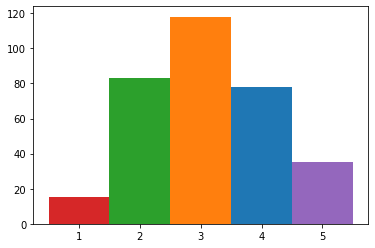

{5: 8.514285714285714, 4: 9.85897435897436, 1: 10.0, 2: 10.734939759036145, 3: 10.838983050847459}


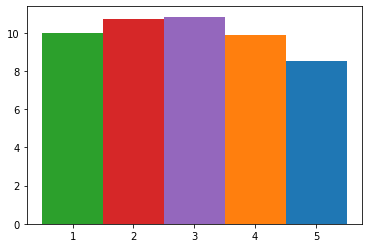

In [96]:
label_container = df['goout'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['goout'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'goout', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [97]:
df = df.drop(df[(df.goout == 1)].index)

les variables
[1 2 5 3 4]

Nombre de variable
{1: 220, 2: 62, 5: 5, 3: 20, 4: 7}



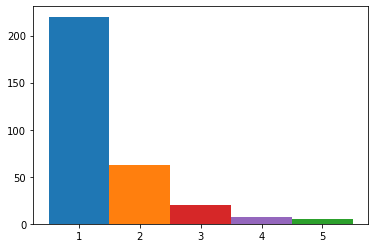

{2: 8.82258064516129, 4: 9.714285714285714, 1: 10.618181818181819, 3: 11.35, 5: 11.8}


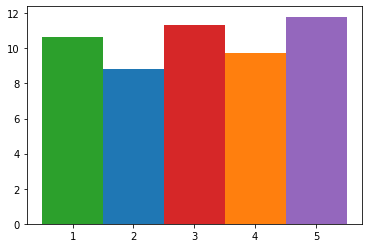

In [98]:
label_container = df['Dalc'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['Dalc'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'Dalc', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [99]:
del df["Dalc"]

les variables
[1 3 2 4 5]

Nombre de variable
{1: 114, 3: 66, 2: 74, 4: 42, 5: 18}



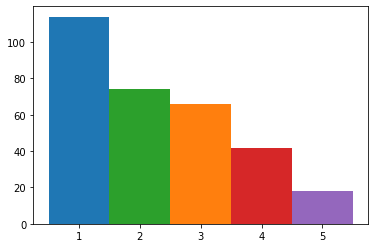

{4: 9.595238095238095, 2: 10.108108108108109, 3: 10.515151515151516, 1: 10.517543859649123, 5: 10.722222222222221}


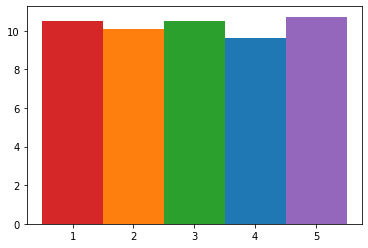

In [100]:
label_container = df['Walc'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['Walc'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'Walc', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

les variables
[3 5 1 2 4]

Nombre de variable
{3: 74, 5: 117, 1: 33, 2: 34, 4: 56}



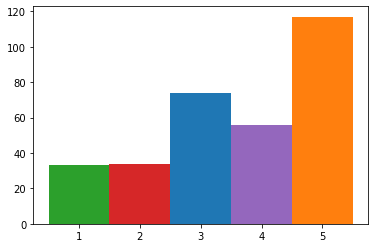

{3: 9.41891891891892, 2: 10.147058823529411, 5: 10.222222222222221, 4: 10.446428571428571, 1: 12.545454545454545}


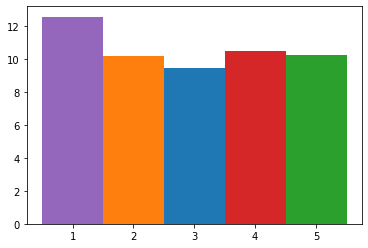

In [101]:
label_container = df['health'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['health'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'health', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [102]:
#del df["health"]

les variables
[ 6  4 10  2  0 14 16  7 25  8 12 54 26 20 18 56 24 28  5 13 15 22  3  1
 19  9 11 38 23]

Nombre de variable
{6: 24, 4: 45, 10: 15, 2: 54, 0: 89, 14: 7, 16: 3, 7: 7, 25: 1, 8: 17, 12: 10, 54: 1, 26: 1, 20: 2, 18: 4, 56: 1, 24: 1, 28: 1, 5: 5, 13: 3, 15: 3, 22: 3, 3: 6, 1: 3, 19: 1, 9: 3, 11: 2, 38: 1, 23: 1}



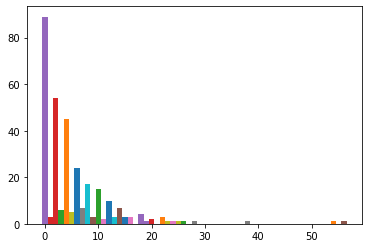

{26: 6.0, 56: 8.0, 22: 8.0, 38: 8.0, 0: 8.157303370786517, 15: 8.333333333333334, 18: 8.75, 28: 9.0, 14: 9.714285714285714, 19: 10.0, 8: 10.235294117647058, 20: 10.5, 10: 10.6, 12: 10.8, 16: 11.0, 25: 11.0, 54: 11.0, 4: 11.044444444444444, 6: 11.375, 5: 11.6, 7: 11.857142857142858, 2: 11.88888888888889, 3: 12.333333333333334, 13: 12.666666666666666, 1: 13.0, 11: 13.0, 23: 13.0, 9: 13.333333333333334, 24: 18.0}


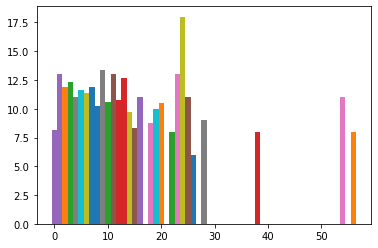

In [103]:
label_container = df['absences'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['absences'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'absences', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [104]:
#del df["absences"]

les variables
[ 5  7 15  6 12 16 10 14 13  8 11  9 19  4 17 18  3]

Nombre de variable
{5: 6, 7: 30, 15: 17, 6: 18, 12: 32, 16: 18, 10: 43, 14: 26, 13: 23, 8: 31, 11: 30, 9: 27, 19: 3, 4: 1, 17: 4, 18: 4, 3: 1}



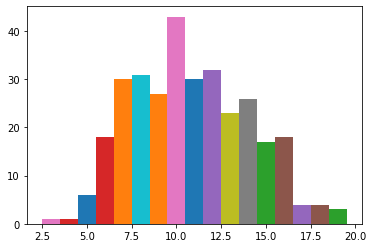

{4: 0.0, 6: 4.277777777777778, 3: 5.0, 5: 5.166666666666667, 7: 5.5, 8: 7.838709677419355, 9: 8.25925925925926, 10: 9.30232558139535, 11: 10.766666666666667, 12: 12.0, 13: 12.782608695652174, 14: 13.73076923076923, 15: 14.882352941176471, 16: 16.0, 17: 16.5, 18: 17.75, 19: 19.0}


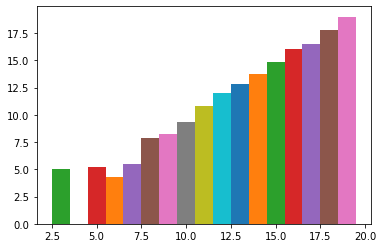

In [105]:
label_container = df['G1'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['G1'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'G1', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

les variables
[ 6  5  8 14 10 15 12 18 13  9 16 11 19  7 17  4  0]

Nombre de variable
{6: 12, 5: 11, 8: 22, 14: 18, 10: 40, 15: 28, 12: 35, 18: 8, 13: 31, 9: 42, 16: 9, 11: 23, 19: 1, 7: 17, 17: 4, 4: 1, 0: 12}



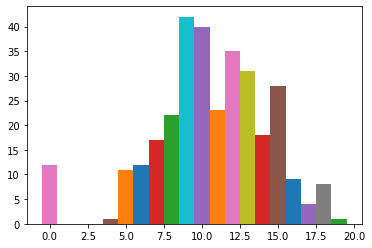

{4: 0.0, 0: 0.0, 5: 3.0, 6: 5.0, 7: 6.647058823529412, 8: 7.181818181818182, 9: 8.238095238095237, 10: 9.75, 11: 10.956521739130435, 12: 11.942857142857143, 13: 13.161290322580646, 14: 14.0, 15: 15.285714285714286, 16: 15.88888888888889, 17: 17.25, 18: 18.375, 19: 20.0}


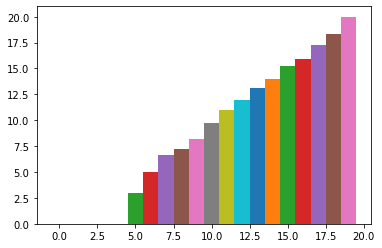

In [106]:
label_container = df['G2'].unique()

print("les variables")
print(label_container)
print("")
    
nb_var = {label: len(df[df['G2'] == label]) for label in label_container}
    

print("Nombre de variable")
print(nb_var)
print("")
    
ploting(nb_var, "")

final_note = {label: recuperate_labels_from_one_label(df, 'G2', label) for label in label_container}
final_note = dict(sorted(final_note.items(), key=lambda item: item[1]))

print(final_note)
ploting(final_note, "")

In [107]:
df.head()

,age,Medu,Fedu,Fjob,traveltime,paid,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,18,4,4,teacher,2,no,no,4,3,4,1,3,6,5,6,6
1,17,1,1,other,1,no,no,5,3,3,1,3,4,5,5,6
2,15,1,1,other,1,yes,no,4,3,2,3,3,10,7,8,10
3,15,4,2,services,1,yes,yes,3,2,2,1,5,2,15,14,15
4,16,3,3,other,1,yes,no,4,3,2,2,5,4,6,10,10


In [108]:
df.shape

(314, 16)

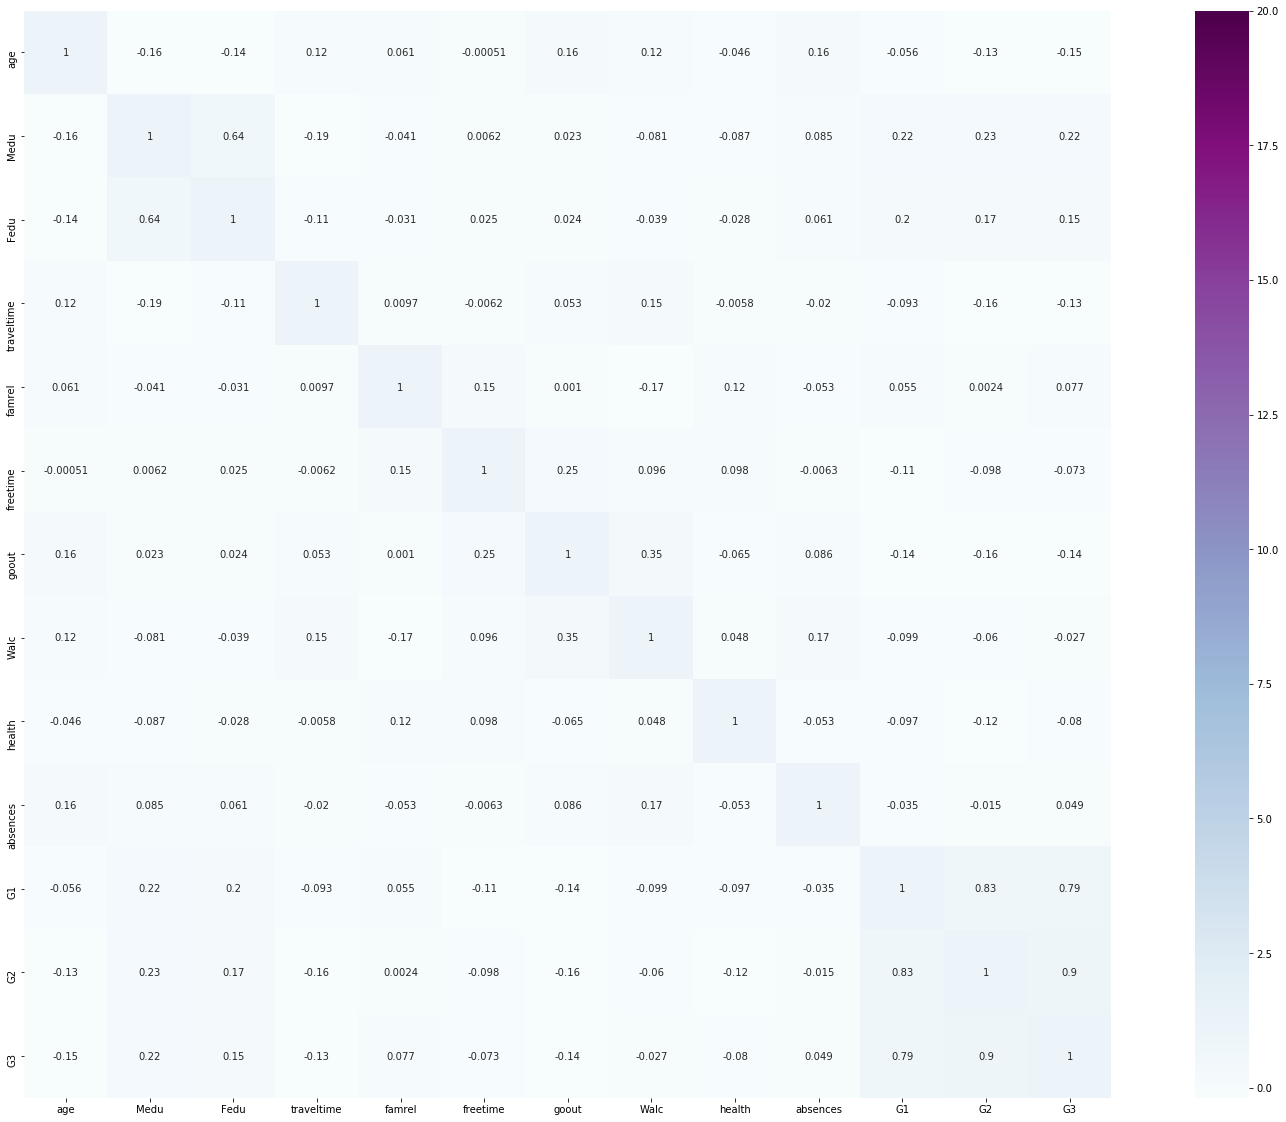

In [109]:
import seaborn as sns
matrix=df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(matrix, vmax=20, square=True, cmap="BuPu", annot=True)

# Analyse bivariée

In [110]:
df.head()

,age,Medu,Fedu,Fjob,traveltime,paid,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,18,4,4,teacher,2,no,no,4,3,4,1,3,6,5,6,6
1,17,1,1,other,1,no,no,5,3,3,1,3,4,5,5,6
2,15,1,1,other,1,yes,no,4,3,2,3,3,10,7,8,10
3,15,4,2,services,1,yes,yes,3,2,2,1,5,2,15,14,15
4,16,3,3,other,1,yes,no,4,3,2,2,5,4,6,10,10


In [111]:
# L'age et sexe a un impact sur la note ?

In [112]:
# L'absence et sexe a un impact sur la note ?

In [113]:
# Le traveltime et health a un impact sur la note ?

In [114]:
# One hot encoding car la labélisation par etiquettage peut influencer nos modèles.
# En effet, il peut y avoir une notion de hiéarchie la ou il ne faut pas. Cependant cela nous rajoute
# des lignes.
df=pd.get_dummies(df)

In [115]:
# Normaliser les data avec:
    # soit: normalized_df=(df-df.mean())/df.std()
    # soit: normalized_df=(df-df.min())/(df.max()-df.min())

In [116]:
normalized_df_1_1 = (df-df.mean())/df.std()

In [117]:
normalized_df_1_1.head()

,age,Medu,Fedu,traveltime,famrel,freetime,goout,Walc,health,absences,...,G3,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,paid_no,paid_yes,romantic_no,romantic_yes
0,1.133028,1.136535,1.307295,0.796290,0.038690,-0.210698,0.827350,-1.034451,-0.446427,0.090285,...,-0.950161,-0.21568,-0.223623,-1.113058,-0.632856,3.729336,0.948765,-0.948765,0.707667,-0.707667
1,0.285955,-1.651527,-1.441526,-0.640693,1.143102,-0.210698,-0.215975,-1.034451,-0.446427,-0.191799,...,-0.950161,-0.21568,-0.223623,0.895564,-0.632856,-0.267290,0.948765,-0.948765,0.707667,-0.707667
2,-1.408192,-1.651527,-1.441526,-0.640693,0.038690,-0.210698,-1.259300,0.573557,-0.446427,0.654452,...,-0.068119,-0.21568,-0.223623,0.895564,-0.632856,-0.267290,-1.050645,1.050645,0.707667,-0.707667
3,-1.408192,1.136535,-0.525253,-0.640693,-1.065723,-1.618338,-1.259300,-1.034451,1.029131,-0.473883,...,1.034433,-0.21568,-0.223623,-1.113058,1.575107,-0.267290,-1.050645,1.050645,-1.408594,1.408594
4,-0.561119,0.207181,0.391021,-0.640693,0.038690,-0.210698,-1.259300,-0.230447,1.029131,-0.191799,...,-0.068119,-0.21568,-0.223623,0.895564,-0.632856,-0.267290,-1.050645,1.050645,0.707667,-0.707667


In [118]:
normalized_df0_1 = (df-df.min())/(df.max()-df.min())

In [119]:
normalized_df0_1.head()

,age,Medu,Fedu,traveltime,famrel,freetime,goout,Walc,health,absences,...,G3,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,paid_no,paid_yes,romantic_no,romantic_yes
0,0.75,1.000000,1.000000,0.333333,0.75,0.5,0.666667,0.00,0.5,0.107143,...,0.30,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.50,0.000000,0.000000,0.000000,1.00,0.5,0.333333,0.00,0.5,0.071429,...,0.30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.00,0.000000,0.000000,0.000000,0.75,0.5,0.000000,0.50,0.5,0.178571,...,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.00,1.000000,0.333333,0.000000,0.50,0.0,0.000000,0.00,1.0,0.035714,...,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.25,0.666667,0.666667,0.000000,0.75,0.5,0.000000,0.25,1.0,0.071429,...,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [120]:
# Baisse de prédiction...

In [121]:
# Cross validation non croisé.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#
from sklearn.preprocessing import StandardScaler

# Parameters searching.
from sklearn.model_selection import GridSearchCV

#
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression


# Regression linéaire.
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Knn
from sklearn.neighbors import KNeighborsRegressor

# Svr
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# Ensemble learning
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [122]:
# Cross validation k-fold -> évite le suraprentissage

In [123]:
# regression linéaire
    # ridge -> évite le suraprentissage
    # lasso -> évite le suraprentissage
    # elastic net -> combo de ridge + lasso

# Knn -> parfait pour les petites données à cause de la sauvegarde des data en mémoire, sensible au over data
# Svr -> généralise bien avec peu de donnée / baisse de perf avec beaucoup de perf (one vs all très long)

In [124]:
# Essayer un grid search 
    # knn = [ k: {1, 3, 5, 7} ]
    #random forest = [ deepth: {5, 10, 15, 20, 25, 30, 100}]

In [125]:
#random forest
    # bagging -> plusieurs entité d'un meme model (model faible) qui forme un gros model ou p >= 51%
        # bootstraping: entrainement sur jeu aléatoire de donnée puis replacement...
    # boosting -> sequentielle, les modèles apprenent de l'ancien
        # adaboost -> plusieurs arbre de decision qui forme une foret
    # stacking -> un dernier modele qui dit qui a tord qui a faux.
    # xgboost -> avec arbre. Merci framework.

In [126]:
# Division des données.
y = df["G3"]
X = df.drop(["G3"], axis=1)

In [127]:
#Cross validation non croisée.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression linéaire

In [128]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.8301901648401686
0.8792188806997189


In [129]:
a = cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean()
b = cross_val_score(LinearRegression(), X_test, y_test, cv=5).mean()
print(a)
print(b)

0.8064481027065484
0.8354246530994928


## Regression linéaire avec gridsearch

In [186]:
param_grid = {"fit_intercept": [False, True], "normalize": [False, True], "copy_X": [False, True], "positive": [False, True]}

In [191]:
grid = GridSearchCV(LinearRegression(), param_grid, cv=20)
grid.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=LinearRegression(),
             param_grid={'copy_X': [False, True],
                         'fit_intercept': [False, True],
                         'normalize': [False, True],
                         'positive': [False, True]})

In [192]:
print(grid.best_score_)
print(grid.best_params_)
grid = grid.best_estimator_
print(grid.score(X_test, y_test))

0.7737044569660874
{'copy_X': False, 'fit_intercept': False, 'normalize': False, 'positive': True}
0.8791633103650672


## Regression linéaire avec ridge

In [135]:
#param_grid = {"alpha": np.arange(1, 100), "fit_intercept": [False, True], "normalize": [False, True],
#             "copy_X": [False, True], "tol": [np.arange(0, 1, 0.1)], 
#              "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
#             }

In [194]:
grid = Ridge()
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

0.830181158609632
0.8797748369633825


## Regression linéaire avec Lasso

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

In [197]:
param_grid = {"alpha": np.arange(1, 100)}
grid = GridSearchCV(linear_model.Lasso(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
grid = grid.best_estimator_
print(grid.score(X_test, y_test))

{'alpha': 1}
0.8897788792198184


## Regression linéaire avec ElasticNet

In [198]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.8086687271335324
0.8822698143549943


## Regression avec Knn

In [155]:
param_grid = {"n_neighbors": np.arange(1, 20), "metric": ["euclidean", "manhattan"]}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_
print(model.score(X_test, y_test))

In [160]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=5).mean()
print(a)
b = cross_val_score(KNeighborsRegressor(), X_test, y_test, cv=5).mean()
print(b)

0.8208944705931696

In [162]:
from sklearn.model_selection import validation_curve
grid = cross_val_score(GridSearchCV(KNeighborsRegressor(), param_grid, cv=5), X_train, y_train, cv=5).mean()
grid

0.8234678581220873

In [163]:
neigh = KNeighborsRegressor(n_neighbors=10, metric="euclidean")
neigh.fit(X_train, y_train)
print(neigh.score(X_train, y_train))
print(neigh.score(X_train, y_train))

In [167]:
cross_val_score(KNeighborsRegressor(n_neighbors=10, metric="euclidean"), X_train, y_train, cv=5).mean()

0.8237948095812238

# SVR

In [168]:
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

SVR(epsilon=0.2)

In [171]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

# Ensemble learning

## Random forest

In [174]:
regr = RandomForestRegressor(max_depth=100, random_state=100)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

In [178]:
# Avec gridsearch
param_grid = {"n_estimators": np.arange(1, 20), "criterion": ["mse"], "max_depth": [1, 1000]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
grid = grid.best_estimator_
print(grid.score(X_test, y_test))

{'criterion': 'mse', 'max_depth': 1000, 'n_estimators': 14}
0.8511890280745023
0.905082744831107


In [179]:
regr = RandomForestRegressor(max_depth=100, criterion="mse", n_estimators=12, random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9755756554720872
0.9311656243795909


# Bagging techinic

In [180]:
regr = BaggingRegressor(base_estimator=SVR(), n_estimators=300, random_state=0).fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.7789900123509798
0.8693596289262525


In [181]:
regr = BaggingRegressor(base_estimator=RandomForestRegressor(
    max_depth=300, criterion="mse", n_estimators=14, random_state=0), 
                        n_estimators=10, random_state=0).fit(X_train, y_train)

print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9463382725206742
0.9220777673785416


# Boosting technich

In [182]:
from sklearn.ensemble import GradientBoostingRegressor

In [183]:
reg = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9463382725206742
0.9220777673785416


# Stacking technic

In [184]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
reg.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9463382725206742
0.9220777673785416


In [ ]:
# Vive les chips